## Wstęp

#### Rozwiązanie problemu BipedalWalker przy użyciu algorytmu PPO:

In [9]:
import gymnasium as gym
import matplotlib.pyplot as plt
from stable_baselines3 import SAC, PPO, A2C

#### PPO - Proximal Policy Optimization
#### gamma = 0.9

In [10]:
# Pętla uczenia
env = gym.make("BipedalWalker-v3")

for i in range(10):
    
    model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./a2c_bipedalwalker_tensorboard/", gamma=0.975)
    model.learn(total_timesteps=50_000)
    
    rewards = []
    infos = []

    vec_env = model.get_env()
    obs = vec_env.reset()
    
vec_env = model.get_env()
obs = vec_env.reset()
    

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./a2c_bipedalwalker_tensorboard/PPO_21
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.6e+03  |
|    ep_rew_mean     | -113     |
| time/              |          |
|    fps             | 678      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.6e+03     |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 600         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009812845 |
|    clip_fraction        | 0.112       |
|    clip_r

#### gamma = 0.99

In [5]:
# Środowisko BipedalWalker
# env_99 = gym.make("BipedalWalker-v3", render_mode="rgb_array")
# model_99 = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./a2c_bipedalwalker_tensorboard/", gamma=0.99)
# 
# # Pętla uczenia
# for i in range(10):
#     model_99.learn(total_timesteps=50_000)
# 
# # Let's visualize the agent's behavior
# 
# 
# vec_env_99 = model_99.get_env()
# obs_99 = vec_env_99.reset()

#### gamma = 0.95

In [6]:
# Środowisko BipedalWalker
# env_95 = gym.make("BipedalWalker-v3", render_mode="rgb_array")
# model_95 = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./a2c_bipedalwalker_tensorboard/", gamma=0.95)
# 
# # Pętla uczenia
# for i in range(10):
#     model_95.learn(total_timesteps=50_000)
#     
# # Let's visualize the agent's behavior
# 
# 
# vec_env_95 = model_95.get_env()
# obs_95 = vec_env_95.reset()

#### Testowanie predykcji modelu 

In [7]:
# Testowanie modelu
for i in range(5000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = vec_env.step(action)
    vec_env.render("human")
    # saving rewards and info
    rewards.append(reward)
    infos.append(info)
    #show video
    if done:
        break

/home/razogarz/anaconda3/envs/gymenv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:225: UserWarning: You tried to render a VecEnv with mode='human' but the render mode defined when initializing the environment must be 'human' or 'rgb_array', not 'None'.
  warnings.warn(


#### Wykres nagród

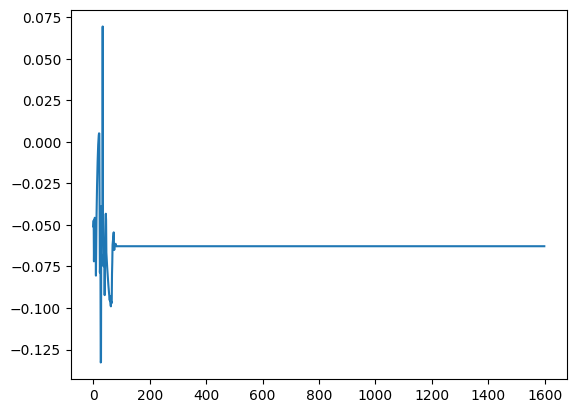

In [8]:
plt.plot(rewards)
plt.show()